In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Driven Dissipative Dynamics


In [56]:
# Expectation values for a(n open) system coupled to a classical driving field. 
# Rabi oscillations are easily found. 

def Rabi(A_in, w_in,gamma_in):

    #
    # problem parameters:
    #
    delta = 0.0 * 2 * np.pi  # qubit sigma_x coefficient
    eps0 = 1.0 * 2 * np.pi   # qubit sigma_z coefficient
    A =  A_in * 2 * np.pi    # drive amplitude (reducing -> RWA more accurate)
    w = w_in * 2 * np.pi     # drive frequency
    gamma1 = gamma_in        # relaxation rate
    n_th = 0.0               # average number of excitations ("temperature")
    psi0 = basis(2, 1)       # initial state

    #
    # Hamiltonian
    #
    sx = sigmax()
    sz = sigmaz()
    sm = destroy(2)

    H0 = - delta / 2.0 * sx - eps0 / 2.0 * sz
    H1 = - A * sx

    # define the time-dependence of the hamiltonian using the list-string format
    args = {'w': w}
    Ht = [H0, [H1, 'sin(w*t)']]

    #
    # collapse operators
    #
    c_op_list = []

    rate = gamma1 * (1 + n_th)
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm)       # relaxation

    rate = gamma1 * n_th
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm.dag())  # excitation

    #
    # evolve and system subject to the time-dependent hamiltonian
    #
#     tlist = np.linspace(0, 5.0 * 2 * np.pi / A, 500)
    tlist = np.linspace(0, 500, 1e3)
    output1 = mesolve(Ht, psi0, tlist, c_op_list, [sm.dag() * sm], args)

    # Alternative: write the hamiltonian in a rotating frame, and neglect the
    # the high frequency component (rotating wave approximation), so that the
    # resulting Hamiltonian is time-independent.
    H_rwa = - delta / 2.0 * sx - A * sx / 2
    output2 = mesolve(H_rwa, psi0, tlist, c_op_list, [sm.dag() * sm])

    #
    # Plot the solution
    #
    plt.plot(tlist, np.real(output1.expect[0]), 'b', tlist, np.real(output2.expect[0]), 'r')
    plt.xlabel('Time')
    plt.ylabel('Occupation probability')
    plt.title('Excitation probabilty of qubit')
    plt.legend(("Time-dependent Hamiltonian", "Corresponding RWA"))
    plt.show()

sx = sigmax()
sz = sigmaz()
sm = destroy(2)   
    
def HRWA(A_in, w_in):

    #
    # problem parameters:
    #
    delta = 0.0 * 2 * np.pi  # qubit sigma_x coefficient
    eps0 = 1.0 * 2 * np.pi   # qubit sigma_z coefficient
    A =  A_in * 2 * np.pi    # drive amplitude (reducing -> RWA more accurate)
    w = w_in * 2 * np.pi     # drive frequency
    n_th = 0.0               # average number of excitations ("temperature")
    psi0 = basis(2, 1)       # initial state

    #
    # Hamiltonian
    #

    return - delta / 2.0 * sx - A * sx / 2


def cops(gamma1):
    c_op_list = []
    n_th = 0
    rate = gamma1 * (1 + n_th)
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm)       # relaxation

    rate = gamma1 * n_th
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm.dag())  # excitation

    return c_op_list

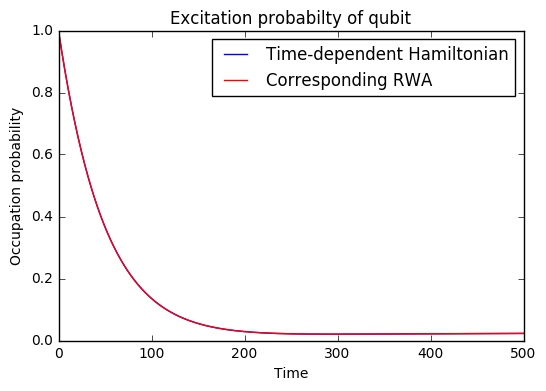

In [57]:
Rabi(0.0005,1.0,0.02)

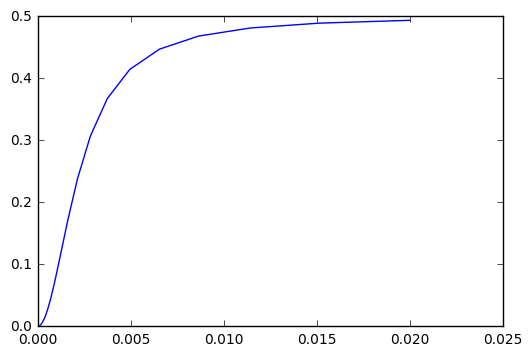

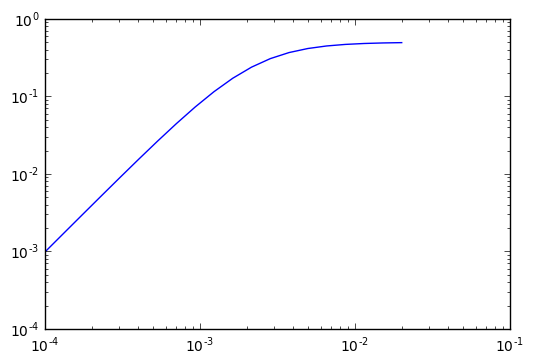

In [71]:
# a_list = np.linspace(1e-8, 2e-2, 100)
a_list = np.logspace(np.log10(1e-4) , np.log10(2e-2) , num=20)

data = [expect(sm.dag() * sm, steadystate(HRWA(a,1.0), cops(0.02))) for a in a_list]

plt.plot(a_list, data)
plt.show()

plt.loglog(a_list, data)
plt.show()

In [68]:
a_list


array([ 0.0001    ,  0.00013216,  0.00017467,  0.00023085,  0.00030509,
        0.00040321,  0.00053289,  0.00070428,  0.0009308 ,  0.00123016,
        0.0016258 ,  0.0021487 ,  0.00283976,  0.00375309,  0.00496016,
        0.00655545,  0.00866382,  0.01145029,  0.01513293,  0.02      ])

In [59]:
sm.dag() * sm

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  0.]
 [ 0.  1.]]